In [11]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import matplotlib.pyplot as plt #추가
%matplotlib inline

#import csv

#f=open('task1_trainset.csv','r',encoding='UTF-8')
#rdr=csv.reader(f)
#for line in rdr:
#     print(line)
#f.close()

train_data=pd.read_csv("./task1_trainset.csv")
train_data

from sklearn.feature_extraction.text import TfidfVectorizer
text = ['task1_trainset.csv']
tfidf_vectorizer = TfidfVectorizer()



In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
train_data.head()

,Id,Title,Abstract,Authors,Categories,Created Date,Task 1
0,D00001,A Brain-Inspired Trust Management Model to Ass...,Rapid popularity of Internet of Things (IoT) a...,Mahmud/Kaiser/Rahman/Rahman/Shabut/Al-Mamun/Hu...,cs.CR/cs.AI/q-bio.NC,2018-01-11,BACKGROUND OBJECTIVES METHODS METHODS RESULTS ...
1,D00002,On Efficient Computation of Shortest Dubins Pa...,"In this paper, we address the problem of compu...",Sadeghi/Smith,cs.SY/cs.RO/math.OC,2016-09-21,OBJECTIVES OTHERS METHODS/RESULTS RESULTS RESULTS
2,D00003,Data-driven Upsampling of Point Clouds,High quality upsampling of sparse 3D point clo...,Zhang/Jiang/Yang/Yamakawa/Shimada/Kara,cs.CV,2018-07-07,BACKGROUND OBJECTIVES METHODS METHODS METHODS ...
3,D00004,Accessibility or Usability of InteractSE? A He...,Internet is the main source of information now...,Aqle/Khowaja/Al-Thani,cs.HC,2018-08-29,BACKGROUND BACKGROUND BACKGROUND OBJECTIVES OB...
4,D00005,Spatio-Temporal Facial Expression Recognition ...,Automated Facial Expression Recognition (FER) ...,Hasani/Mahoor,cs.CV,2017-03-20,BACKGROUND BACKGROUND BACKGROUND BACKGROUND ME...


Text(0, 0.5, 'Number of title')

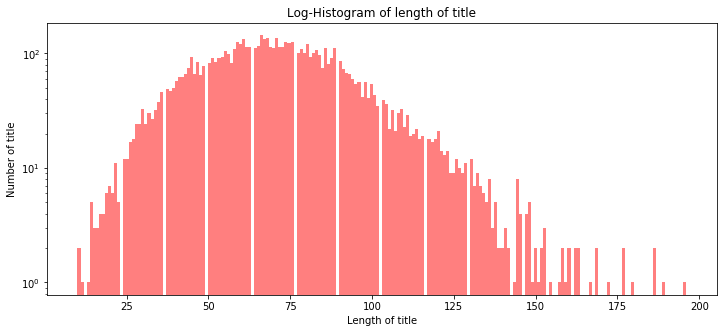

In [14]:
Id = list(train_data['Id'])
Title = list(train_data['Title'])
Abstract = list(train_data['Abstract'])
Authors = list(train_data['Authors'])
Categories = list(train_data['Categories'])
CreatedDate = list(train_data['Created Date'])
Task1= list(train_data['Task 1'])

train_length = train_data['Title'].apply(len) #각 논문제목의 문자길이 분포
train_length.head()


vectorizer = TfidfVectorizer(
            min_df=0.0,
            analyzer="char",
            sublinear_tf=True,
            ngram_range=(1,3),
            max_features=5000
        )

plt.figure(figsize=(12,5)) #to make a log-histogram
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of title')
plt.xlabel('Length of title')
plt.ylabel('Number of title')

#You can see most of title 

In [15]:
#tfidf_vectorizer.fit(text) # 단어를 학습시킴 
#tfidf_vectorizer.vocabulary_ # 단어사전을 출력 
#sorted(tfidf_vectorizer.vocabulary_.items()) # 단어사전 정렬


(-0.5, 799.5, 599.5, -0.5)

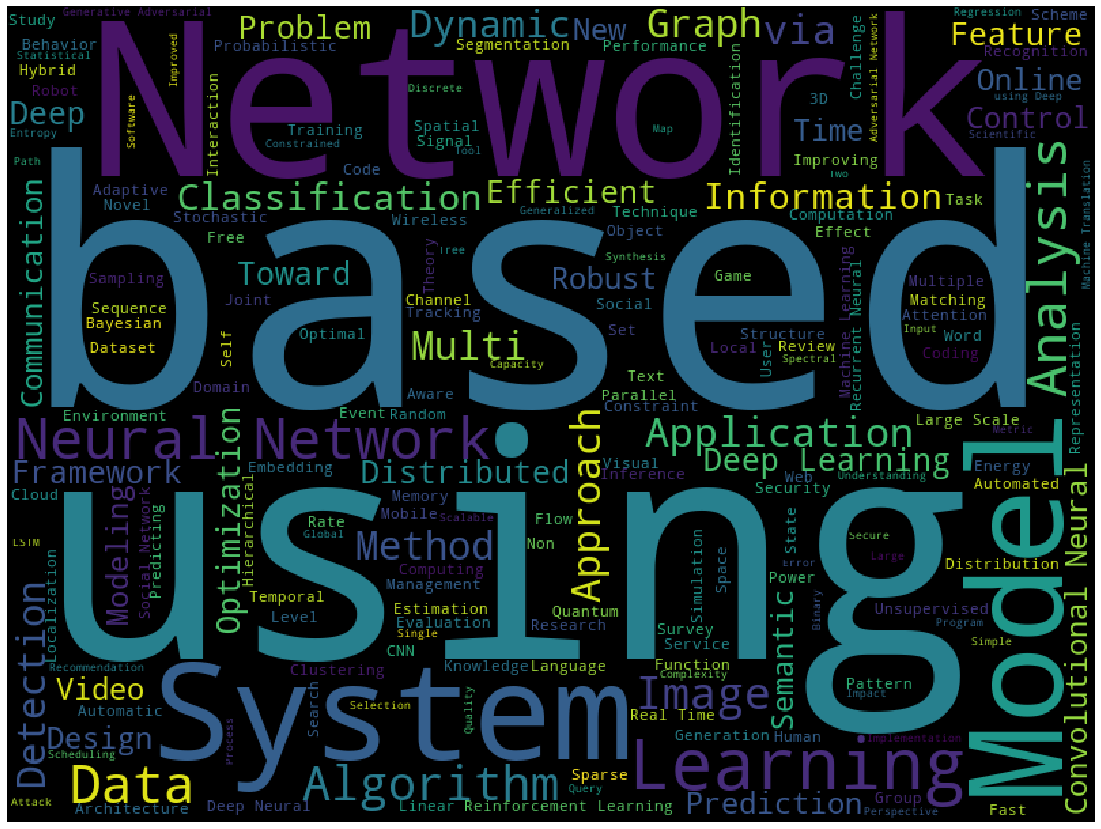

In [16]:
#the most used words - the most used words probably are not important
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['Title']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
#Based, or Using words are the most used ones -> should be removed first

In [18]:
train_data[:10]

,Id,Title,Abstract,Authors,Categories,Created Date,Task 1
0,D00001,A Brain-Inspired Trust Management Model to Ass...,Rapid popularity of Internet of Things (IoT) a...,Mahmud/Kaiser/Rahman/Rahman/Shabut/Al-Mamun/Hu...,cs.CR/cs.AI/q-bio.NC,2018-01-11,BACKGROUND OBJECTIVES METHODS METHODS RESULTS ...
1,D00002,On Efficient Computation of Shortest Dubins Pa...,"In this paper, we address the problem of compu...",Sadeghi/Smith,cs.SY/cs.RO/math.OC,2016-09-21,OBJECTIVES OTHERS METHODS/RESULTS RESULTS RESULTS
2,D00003,Data-driven Upsampling of Point Clouds,High quality upsampling of sparse 3D point clo...,Zhang/Jiang/Yang/Yamakawa/Shimada/Kara,cs.CV,2018-07-07,BACKGROUND OBJECTIVES METHODS METHODS METHODS ...
3,D00004,Accessibility or Usability of InteractSE? A He...,Internet is the main source of information now...,Aqle/Khowaja/Al-Thani,cs.HC,2018-08-29,BACKGROUND BACKGROUND BACKGROUND OBJECTIVES OB...
4,D00005,Spatio-Temporal Facial Expression Recognition ...,Automated Facial Expression Recognition (FER) ...,Hasani/Mahoor,cs.CV,2017-03-20,BACKGROUND BACKGROUND BACKGROUND BACKGROUND ME...
5,D00006,Continuous Semantic Topic Embedding Model Usin...,This paper proposes the continuous semantic to...,Jung/Choi,stat.ML/cs.CL/cs.LG,2017-11-24,OBJECTIVES/METHODS METHODS CONCLUSIONS RESULTS...
6,D00007,Beyond Shared Hierarchies: Deep Multitask Lear...,Existing deep multitask learning (MTL) approac...,Meyerson/Miikkulainen,cs.LG/cs.AI/stat.ML,2017-10-31,BACKGROUND BACKGROUND/OBJECTIVES OBJECTIVES/ME...
7,D00008,Using Scalp Electrical Biosignals to Control a...,In this paper we explore the use of electrical...,George/Lotte/Abad/Lécuyer,cs.OH,2011-11-08,OBJECTIVES METHODS METHODS METHODS METHODS RES...
8,D00009,Robustness from structure: Inference with hier...,How spiking networks are able to perform proba...,Petrovici/Schroeder/Breitwieser/Grübl/Schemmel...,q-bio.NC/cs.NE/stat.ML,2017-03-12,BACKGROUND/OBJECTIVES BACKGROUND BACKGROUND/ME...
9,D00010,Statistical Mechanical Analysis of Low-Density...,Low-density parity-check (LDPC) codes on symme...,Mori/Tanaka,cs.IT/math.IT,2011-10-10,BACKGROUND OBJECTIVES RESULTS/CONCLUSIONS METHODS


In [19]:
#number of words of each thesis title
train_word_counts = train_data['Title'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of Title')

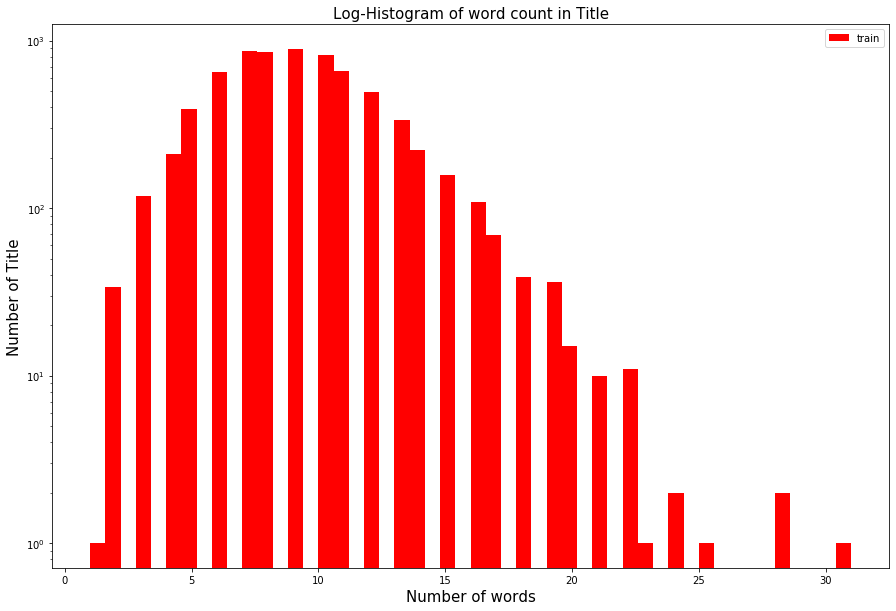

In [21]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in Title', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of Title', fontsize=15)

In [22]:
print('Title word maximum value: {}'.format(np.max(train_word_counts)))
print('Title Word minimum value: {}'.format(np.min(train_word_counts)))
print('Title word average value: {:.2f}'.format(np.mean(train_word_counts)))
print('Title word count standard deviation: {:.2f}'.format(np.std(train_word_counts)))
print('Title word midium value: {}'.format(np.median(train_word_counts)))
# For quadrants, the scale is 0 to 100
print('Title Word Count 1 Quartet:: {}'.format(np.percentile(train_word_counts, 25)))
print('Title Word Count 3 Quartet: {}'.format(np.percentile(train_word_counts, 75)))

Title word maximum value: 31
Title Word minimum value: 1
Title word average value: 9.21
Title word count standard deviation: 3.29
Title word midium value: 9.0
Title Word Count 1 Quartet:: 7.0
Title Word Count 3 Quartet: 11.0
